Implementacion de modelo de arbol de decision

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [ ]:
# Cargar el dataset
df = pd.read_csv('winequality-red.csv')

# Mostrar las primeras filas del dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [12]:
print(df.info)

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [4]:
# Verificar el tamaño del dataset
print("Tamaño del dataset:", df.shape)

# Describir el dataset para obtener estadísticas básicas
print(df.describe())

Tamaño del dataset: (1599, 12)
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.01200

In [5]:
# Verificar si hay valores nulos
print("Valores nulos:", df.isnull().sum())

Valores nulos: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


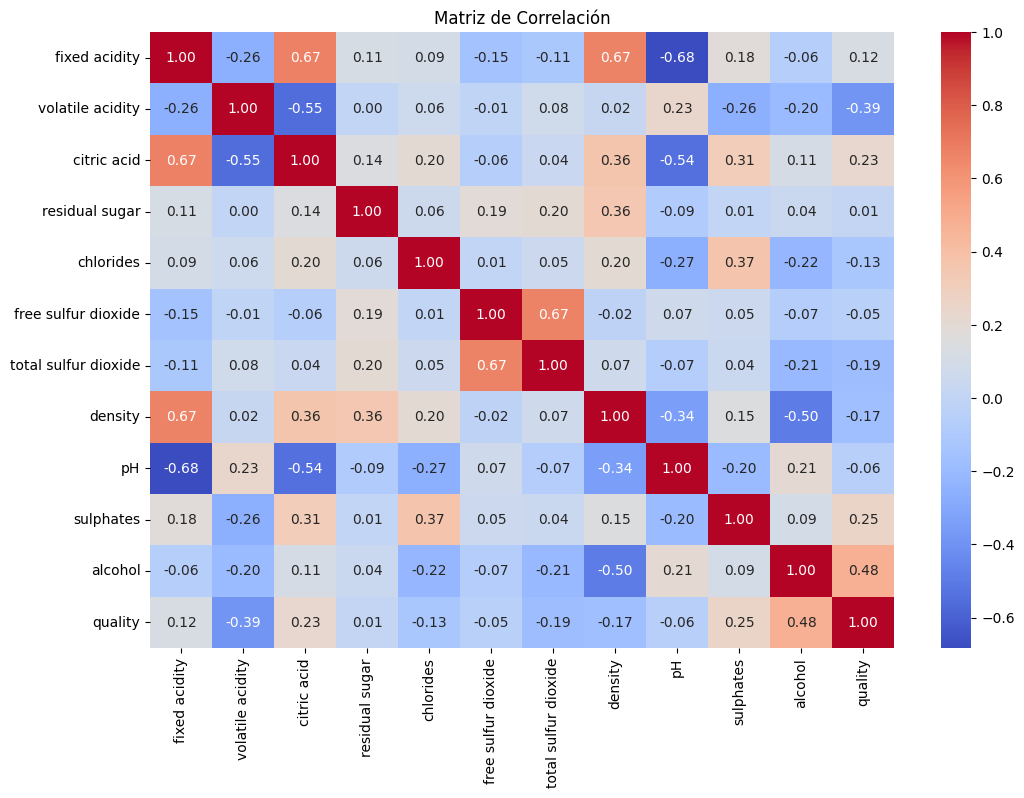

In [6]:
# Correlación entre las variables
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Definimos como variable objetivo a calidad

In [13]:
# Definir variables predictoras y variable objetivo
X = df.drop('quality', axis=1)  # Todas las columnas menos 'quality'
y = df['quality']                # La columna 'quality'

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=8)

# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

Luego de evaluar entrenar el modelo validaremos su presicion

In [10]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.609375
Confusion Matrix:
 [[ 0  1  1  0  0  0]
 [ 1  4  4  2  0  0]
 [ 1  3 89 37  6  0]
 [ 0  3 32 75 15  3]
 [ 0  0  1 11 26  2]
 [ 0  0  0  1  1  1]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.36      0.36      0.36        11
           5       0.70      0.65      0.68       136
           6       0.60      0.59      0.59       128
           7       0.54      0.65      0.59        40
           8       0.17      0.33      0.22         3

    accuracy                           0.61       320
   macro avg       0.39      0.43      0.41       320
weighted avg       0.62      0.61      0.61       320



EL MODELO CUENTA CON UNA CAPACIDAD PREDICTIVA DEL 60.94% POR LO QUE FUNCIONA EN UN CONTEXTO GENERALISTA, SE REQUIERE OPTIMIZAR LOS PESOS Y PROFUNDIDAD DEL ARBOL PARA MEJORAR SU CAPACIDAD Y FIABILIDAD.

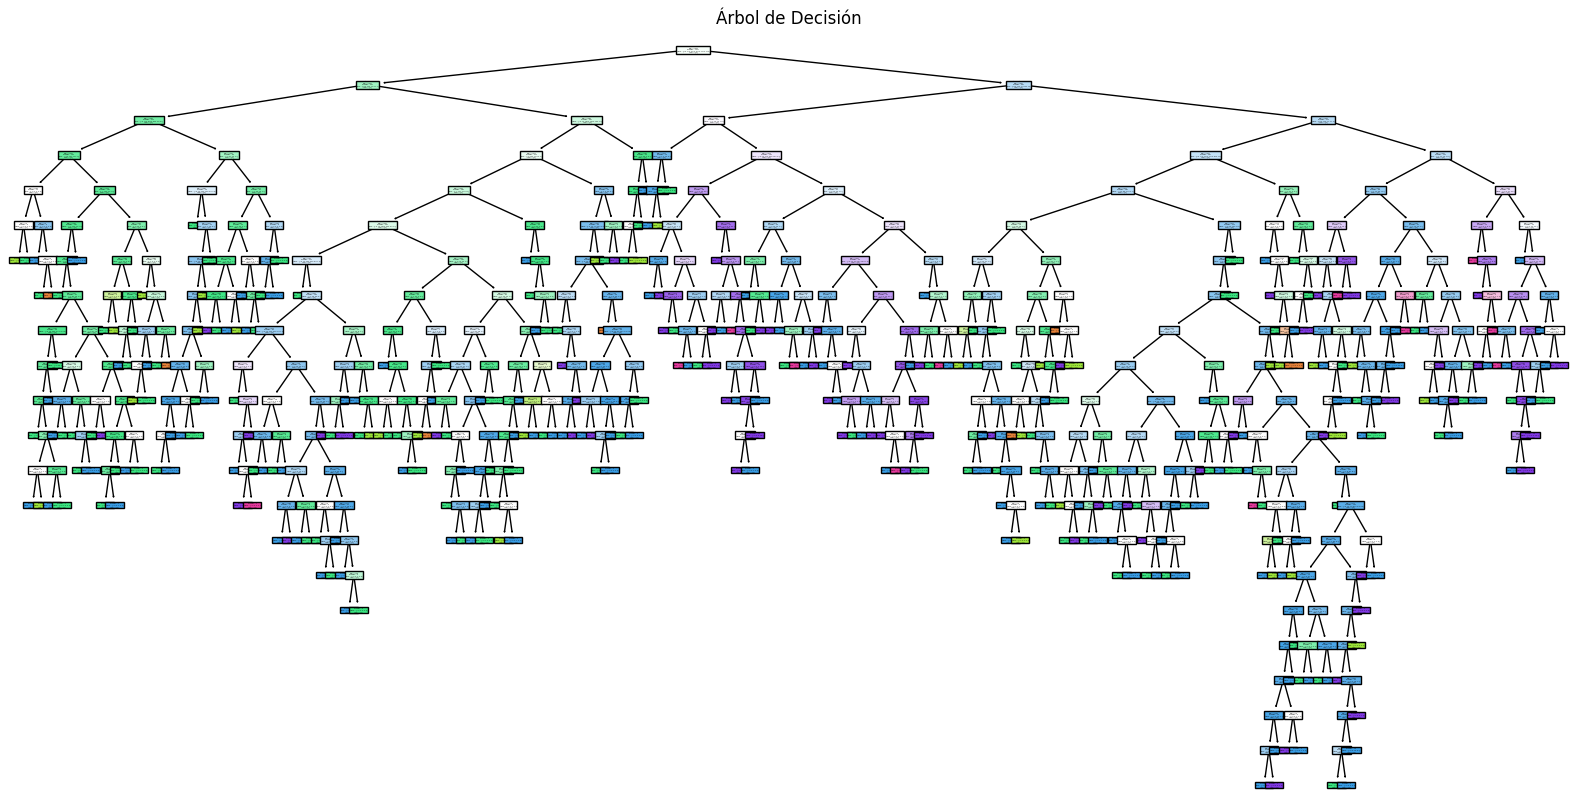

In [11]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.title('Árbol de Decisión')
plt.show()